# VGGNet Model transfer learning

## Load dataset

### Train dataset

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
# All images will be rescaled by 1./255 (for data normalization)
# I add new augmented samples using: rotations, zooming, width and height shifts, shearing, etc.
# This doesn't increase the number of original samples but provides varied data during training, helping with generalization.
train_datagen = ImageDataGenerator(
       rescale=1/255,
       rotation_range=10,
       width_shift_range=0.2,
       height_shift_range=0.2,
       shear_range=0.2,
       zoom_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
       './data/train/', 
       target_size=(image_size, image_size),
       batch_size=16,
       class_mode='categorical')


Found 905 images belonging to 5 classes.


### Test dataset

In [2]:
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

test_generator =  test_datagen.flow_from_directory("./data/test/",
                                                        batch_size=16,
                                                        class_mode  = 'categorical',
                                                        target_size = (image_size, image_size))

Found 145 images belonging to 5 classes.


## Create the model

### Load pre-trained VGG model

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 model, pre-trained on ImageNet
base_model = VGG16(input_shape=(224, 224, 3),
                   include_top=False,
                   weights='imagenet')

In [4]:
# Freeze the layers except the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

### Add new head to the model

In [5]:
# add my own FC layers
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation = 'softmax')(x)

In [6]:
from tensorflow.keras import Model
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
head_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,410,949 (154.16 MB)

 Trainable params: 32,775,685 (125.03 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

## Train the model

### callback functions

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks_list = [
    ModelCheckpoint(
        filepath='./models/model_vggnet.keras', 
        monitor='val_loss', 
        save_best_only=True),
    EarlyStopping(
        monitor='val_loss', 
        patience=15),
    ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.05, 
        patience=8)
]

### fit the model

In [9]:
history = head_model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=callbacks_list,  
    verbose=1
)

Epoch 1/50


d:\hasan\my projects\final weather\weather_classification\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 874ms/step - accuracy: 0.4186 - loss: 1.4895 - val_accuracy: 0.6276 - val_loss: 0.9843 - learning_rate: 1.0000e-04
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 51s 889ms/step - accuracy: 0.7794 - loss: 0.5894 - val_accuracy: 0.7241 - val_loss: 0.7250 - learning_rate: 1.0000e-04
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 925ms/step - accuracy: 0.8521 - loss: 0.4113 - val_accuracy: 0.8483 - val_loss: 0.3803 - learning_rate: 1.0000e-04
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 914ms/step - accuracy: 0.9074 - loss: 0.2959 - val_accuracy: 0.8138 - val_loss: 0.5598 - learning_rate: 1.0000e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 917ms/step - accuracy: 0.9243 - loss: 0.2388 - val_accuracy: 0.8690 - val_loss: 0.4518 - learning_rate: 1.0000e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 917ms/step - accuracy: 0.9389 - loss: 0.1635 - val_accuracy: 0.7724 - val_loss: 0.9247 - learning_rate: 1.0000e-04
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 53s 929ms/step - accuracy: 0.91

## Visualize the loss and accuracy list

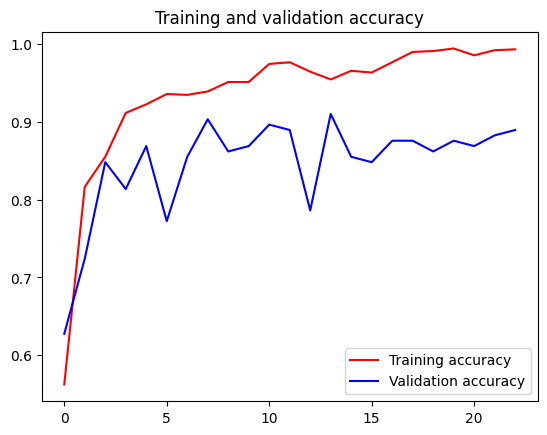

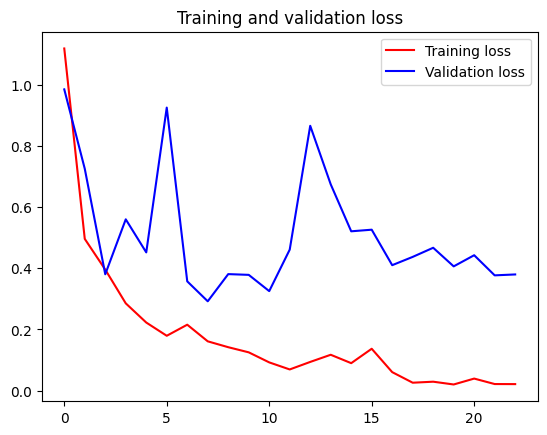

In [10]:
import matplotlib.pyplot as plt
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)